In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report
from keras import callbacks

In [2]:
data_set_contaminantes = pd.read_csv('./Dataset_MinMax.csv',sep=';',decimal=',')
data_set_contaminantes= data_set_contaminantes.drop(['mes','dia','fecha','year'],axis=1)
data_set_contaminantes.head()

,pm2.5,pm10,humedad,puntoRocio,temperatura,dir_viento,viento,precipitacion,AQI,calidad_aire,estacion,mes_sin,mes_cos,dia_sin,dia_cos,dir_viento_sin,dir_viento_cos
0,0.0443,0.1004,0.2366,0.6306,0.8301,0.4888,0.1680,0.0,0.0668,Bueno,0.0,0.75,0.933,0.6008,0.9897,0.5469,0.0022
1,0.0678,0.1571,0.2153,0.7204,0.8548,0.7212,0.1680,0.0,0.0972,Moderado,0.0,0.75,0.933,0.6974,0.9594,0.0145,0.3806
2,0.0597,0.1212,0.4858,0.7776,0.7089,0.5984,0.1195,0.0,0.0911,Moderado,0.0,0.75,0.933,0.7860,0.9102,0.2271,0.0811
3,0.0620,0.1418,0.5667,0.7837,0.6561,0.4318,0.1195,0.0,0.0931,Moderado,0.0,0.75,0.933,0.8629,0.8441,0.7143,0.0483
4,0.0407,0.1061,0.3569,0.7302,0.7754,0.6620,0.1755,0.0,0.0607,Bueno,0.0,0.75,0.933,0.9249,0.7639,0.0884,0.2161


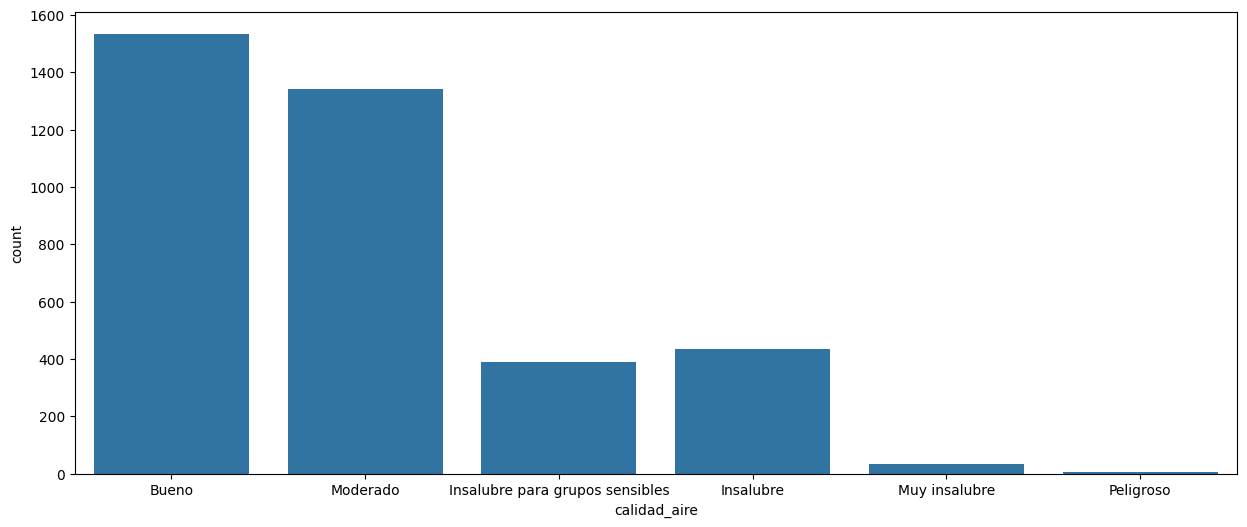

In [3]:
# Ejemplo de ajuste de tamaño del gráfico
plt.figure(figsize=(15, 6))
sns.countplot(x=data_set_contaminantes["calidad_aire"])
plt.show()


In [4]:
data_set_contaminantes['calidad_aire_shifted'] = data_set_contaminantes['calidad_aire'].shift(-1)

def asignar_calidad(row):
    if row['calidad_aire_shifted'] == 'Bueno':
        return 'yes'
    else:
        return 'no'

data_set_contaminantes['goodAirTomorrow'] = data_set_contaminantes.apply(lambda row: asignar_calidad(row), axis=1)

data_set_contaminantes = data_set_contaminantes.drop('calidad_aire_shifted', axis=1)

def asignar_calidad_hoy(row):
    if row['calidad_aire'] == 'Bueno': 
        return 'yes'
    else:
        return 'no'

data_set_contaminantes['goodAirToday'] = data_set_contaminantes.apply(lambda row: asignar_calidad_hoy(row), axis=1)



data_set_contaminantes.head()

,pm2.5,pm10,humedad,puntoRocio,temperatura,dir_viento,viento,precipitacion,AQI,calidad_aire,estacion,mes_sin,mes_cos,dia_sin,dia_cos,dir_viento_sin,dir_viento_cos,goodAirTomorrow,goodAirToday
0,0.0443,0.1004,0.2366,0.6306,0.8301,0.4888,0.1680,0.0,0.0668,Bueno,0.0,0.75,0.933,0.6008,0.9897,0.5469,0.0022,no,yes
1,0.0678,0.1571,0.2153,0.7204,0.8548,0.7212,0.1680,0.0,0.0972,Moderado,0.0,0.75,0.933,0.6974,0.9594,0.0145,0.3806,no,no
2,0.0597,0.1212,0.4858,0.7776,0.7089,0.5984,0.1195,0.0,0.0911,Moderado,0.0,0.75,0.933,0.7860,0.9102,0.2271,0.0811,no,no
3,0.0620,0.1418,0.5667,0.7837,0.6561,0.4318,0.1195,0.0,0.0931,Moderado,0.0,0.75,0.933,0.8629,0.8441,0.7143,0.0483,yes,no
4,0.0407,0.1061,0.3569,0.7302,0.7754,0.6620,0.1755,0.0,0.0607,Bueno,0.0,0.75,0.933,0.9249,0.7639,0.0884,0.2161,yes,yes


<Axes: xlabel='goodAirTomorrow', ylabel='count'>

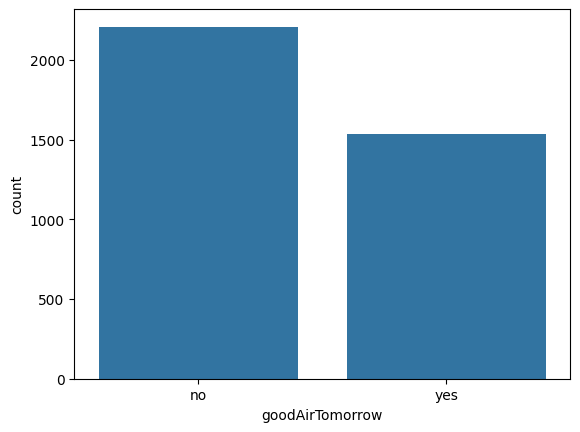

In [5]:
sns.color_palette()
sns.countplot(x= data_set_contaminantes["goodAirTomorrow"])

In [6]:
data_set_contaminantes['goodAirToday'] = data_set_contaminantes['goodAirToday'].map({'yes': 1, 'no': 0})
data_set_contaminantes['goodAirTomorrow'] = data_set_contaminantes['goodAirTomorrow'].map({'yes': 1, 'no': 0})
data_set_contaminantes.head()

,pm2.5,pm10,humedad,puntoRocio,temperatura,dir_viento,viento,precipitacion,AQI,calidad_aire,estacion,mes_sin,mes_cos,dia_sin,dia_cos,dir_viento_sin,dir_viento_cos,goodAirTomorrow,goodAirToday
0,0.0443,0.1004,0.2366,0.6306,0.8301,0.4888,0.1680,0.0,0.0668,Bueno,0.0,0.75,0.933,0.6008,0.9897,0.5469,0.0022,0,1
1,0.0678,0.1571,0.2153,0.7204,0.8548,0.7212,0.1680,0.0,0.0972,Moderado,0.0,0.75,0.933,0.6974,0.9594,0.0145,0.3806,0,0
2,0.0597,0.1212,0.4858,0.7776,0.7089,0.5984,0.1195,0.0,0.0911,Moderado,0.0,0.75,0.933,0.7860,0.9102,0.2271,0.0811,0,0
3,0.0620,0.1418,0.5667,0.7837,0.6561,0.4318,0.1195,0.0,0.0931,Moderado,0.0,0.75,0.933,0.8629,0.8441,0.7143,0.0483,1,0
4,0.0407,0.1061,0.3569,0.7302,0.7754,0.6620,0.1755,0.0,0.0607,Bueno,0.0,0.75,0.933,0.9249,0.7639,0.0884,0.2161,1,1


In [33]:
X = data_set_contaminantes.drop(["goodAirTomorrow","calidad_aire"], axis=1)
y = data_set_contaminantes["goodAirTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('x.shape',X_test.shape)

x.shape (749, 17)


In [8]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # cantidad mínima de cambio para contar como una mejora
    patience=20, # cuántas épocas esperar antes de detener
    restore_best_weights=True,
)
 
model = Sequential()


model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
# model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2, verbose=0)

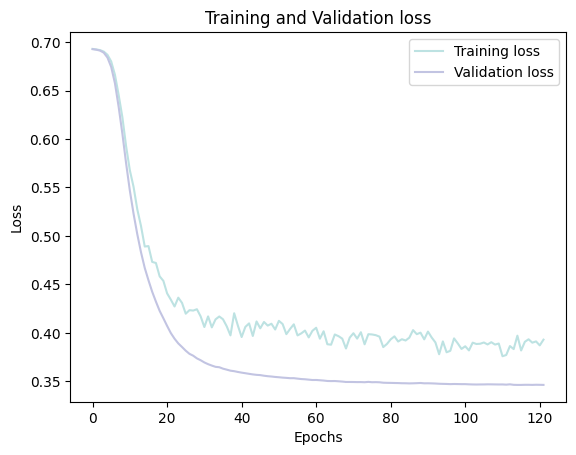

In [9]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

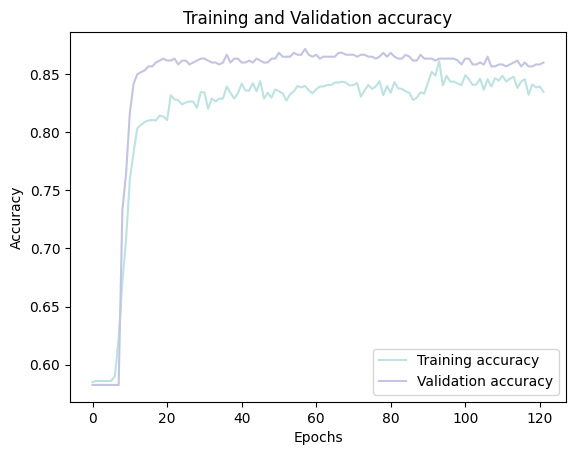

In [10]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

24/24 [==============================] - 0s 714us/step


<Axes: >

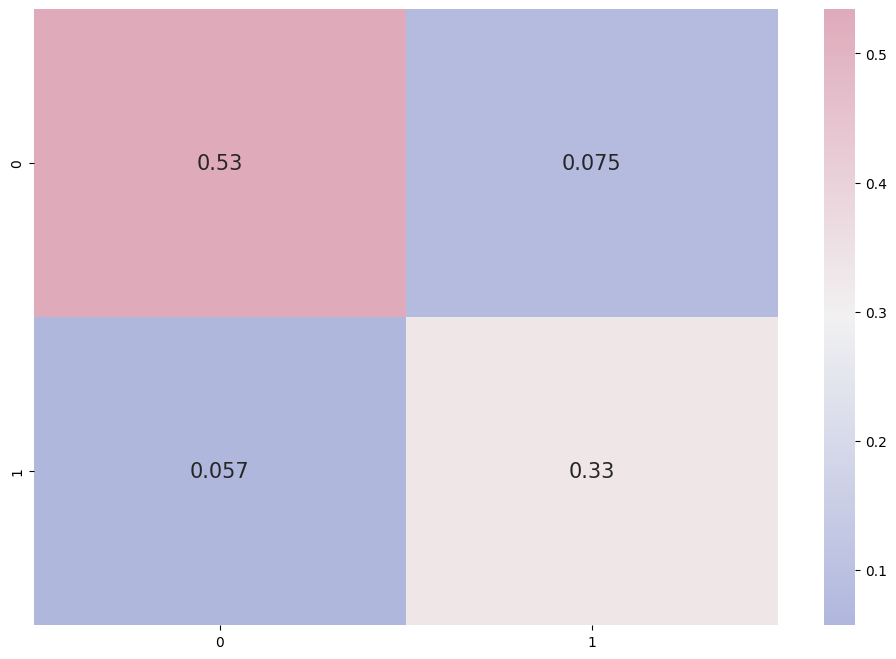

In [26]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [13]:
print(cf_matrix)

[[400  56]
 [ 43 250]]


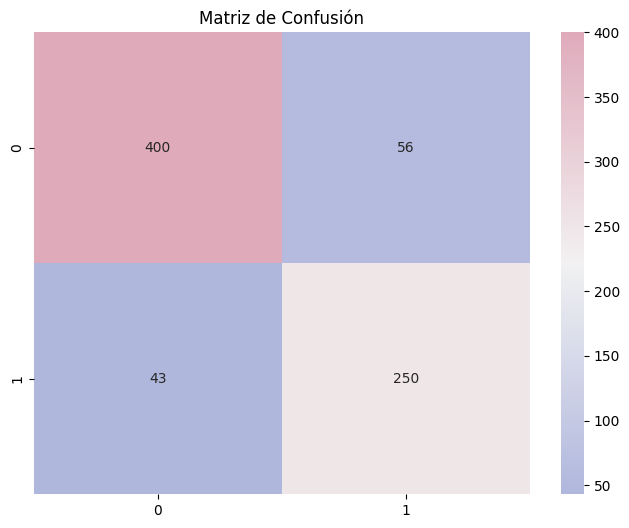

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la matriz de confusión
# Convertir a DataFrame de Pandas para mejor visualización
num_clases = len(cf_matrix)
etiquetas_clases = [f"{i}" for i in range(num_clases)]

df_confusion = pd.DataFrame(cf_matrix, index=etiquetas_clases, columns=etiquetas_clases)

# Crear el heatmap con Seaborn
plt.figure(figsize=(8, 6))

cmap = sns.diverging_palette(260, -10, s=50, l=75, n=5, as_cmap=True)

sns.heatmap(df_confusion, annot=True, fmt="d", cmap=cmap)

# Agregar títulos y etiquetas
plt.title("Matriz de Confusión")
plt.show()


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       456
           1       0.82      0.85      0.83       293

    accuracy                           0.87       749
   macro avg       0.86      0.87      0.86       749
weighted avg       0.87      0.87      0.87       749



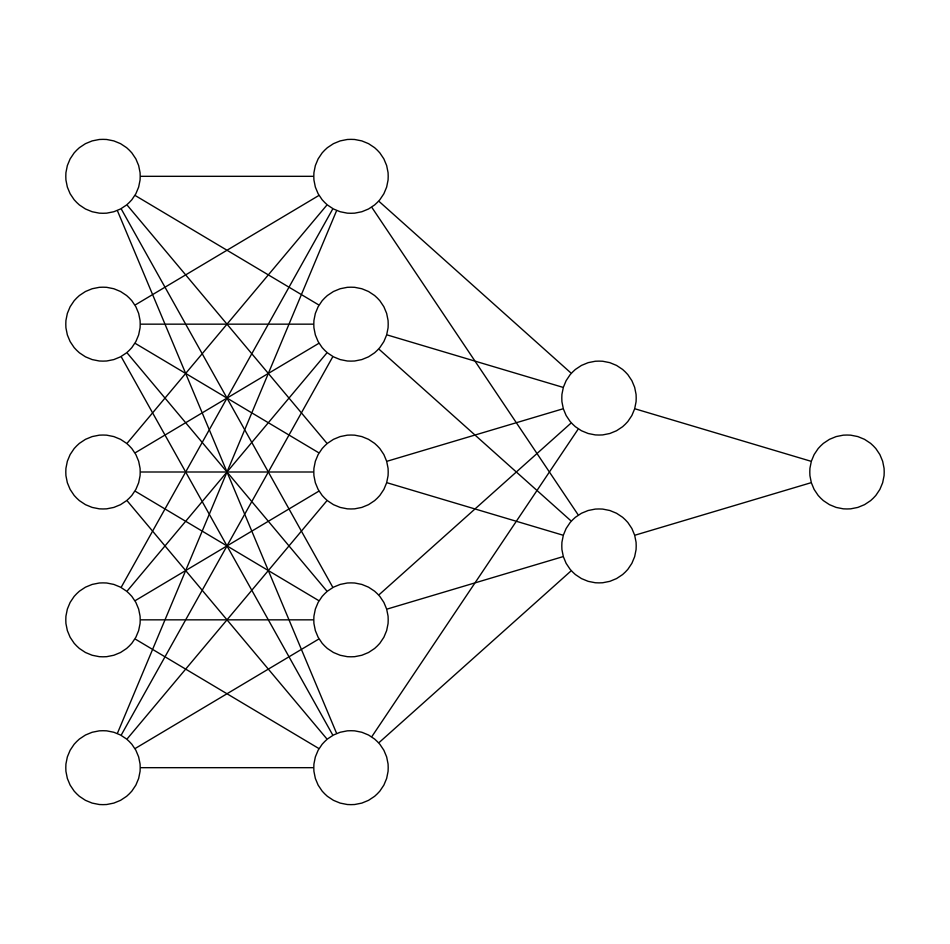

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Dibuja una representación de una red neuronal como una serie de nodos y conexiones.
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodos
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = mpatches.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                     ec='k', fc='w', zorder=4)
            ax.add_patch(circle)

    # Conexiones
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = mpatches.FancyArrowPatch((n*h_spacing + left, layer_top_a - m*v_spacing),
                                                ((n + 1)*h_spacing + left, layer_top_b - o*v_spacing),
                                                mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
                ax.add_patch(line)

# Definir el tamaño de cada capa:
layer_sizes = [5, 5, 2, 1]  # Por ejemplo, 3 nodos en la primera capa, 5 en la segunda, etc.

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()


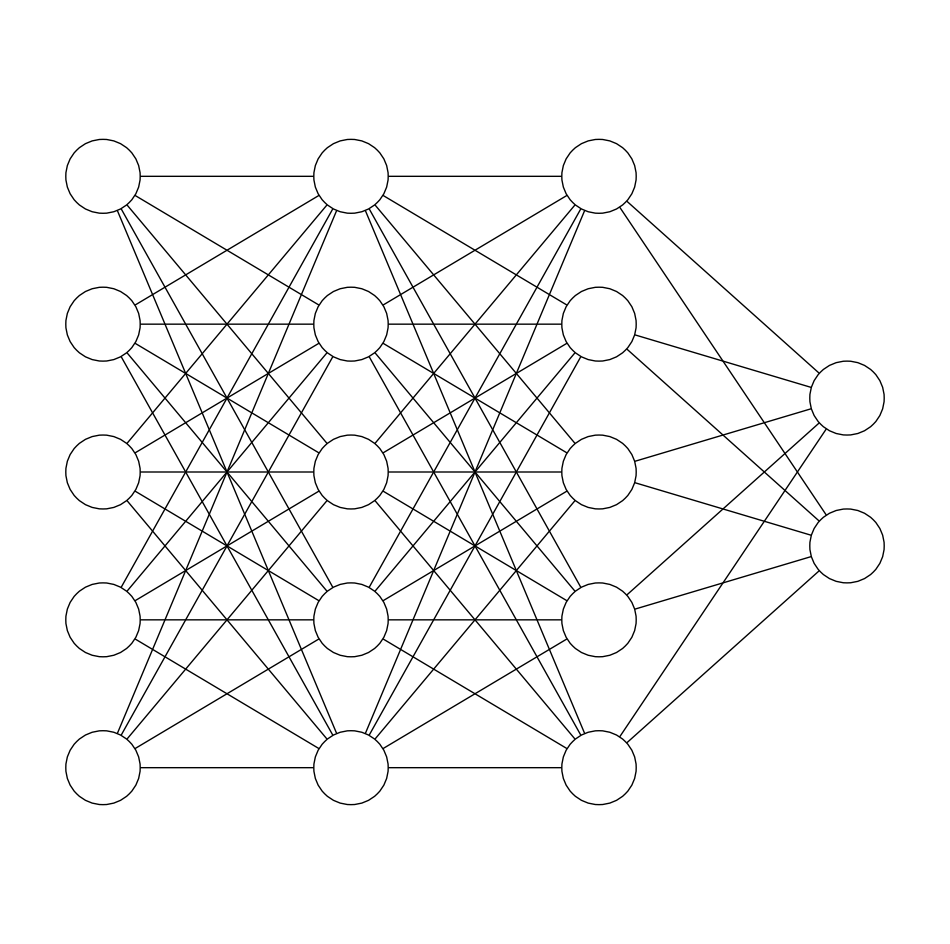

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, dropout_layers=None):
    '''
    Dibuja una representación de una red neuronal con capas de dropout.
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodos
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = mpatches.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                     ec='k', fc='w', zorder=4)
            ax.add_patch(circle)

    # Conexiones y Dropout
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line_color = "k"
                if dropout_layers and n in dropout_layers:
                    line_color = "red"  # Cambia el color para las conexiones de dropout
                line = mpatches.FancyArrowPatch((n*h_spacing + left, layer_top_a - m*v_spacing),
                                                ((n + 1)*h_spacing + left, layer_top_b - o*v_spacing),
                                                mutation_scale=20, lw=1, arrowstyle="-|>", color=line_color)
                ax.add_patch(line)

# Definir el tamaño de cada capa y las capas de dropout:
layer_sizes = [5, 5, 5, 2]  # Por ejemplo, 3 nodos en la primera capa, 5 en la segunda, etc.
# dropout_layers = [1]  # Indica que hay una capa de dropout después de la primera capa oculta

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()


In [17]:
import pandas as pd

# Datos
data = {
    'Precision': [0.90, 0.82, '', 0.86, 0.87],
    'Recall': [0.88, 0.85, '', 0.87, 0.87],
    'F1-score': [0.89, 0.84, 0.87, 0.86, 0.87],
    'Support': [456, 293, 749, 749, 749]
}

# Índices
index = ['0', '1', 'Accuracy', 'Macro avg', 'Weighted avg']

# Crear DataFrame
df = pd.DataFrame(data, index=index)

# Mostrar DataFrame
df

,Precision,Recall,F1-score,Support
0,0.9,0.88,0.89,456
1,0.82,0.85,0.84,293
Accuracy,,,0.87,749
Macro avg,0.86,0.87,0.86,749
Weighted avg,0.87,0.87,0.87,749
